In [ ]:
import tensorflow as tf
# Detect and initialize the TPU
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='')
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)

# Instantiate a distribution strategy
strategy = tf.distribute.TPUStrategy(resolver)

In [ ]:
! git

In [1]:
# Define the operands and operators
OPERANDS = ['x1', 'x2']
OPERATORS = ['|', '&']

In [ ]:
! apt install

In [ ]:
# Read the input data
import pandas as pd

df = pd.read_csv('expressions-886k.csv.gz')

# Extract the columns back into lists
X_count = df['X_count'].tolist()
X_expressions = df['X_expressions'].tolist()
Y_expressions = [tuple(expr) for expr in df['Y_expressions']]

print(len(X_count), len(X_expressions), len(Y_expressions))

886603 886603 886603


In [12]:
from itertools import product, permutations
import random

# Define the operands and operators
#OPERANDS = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
#OPERANDS = ['a', 'b', 'c', 'd', 'e']
#OPERANDS = ['a', 'b', 'c', 'd']
#OPERANDS = ['a', 'b', 'c']
OPERANDS = ['a', 'b', 'c', 'd']
OPERATORS = ['|', '&']

def generate_boolean_expressions(operands=OPERANDS, operators=OPERATORS, N=4):
    if N < 1 or N > len(operands):
        raise ValueError("N must be between 1 and len(operands)")

    operands = operands[:N]

    #print(operands)

    # Generate all possible combinations of operands of length N with repetition
    operand_combinations = product(operands, repeat=N)

    # Generate all possible expressions
    expressions = []
    for operand_combination in operand_combinations:
        # Generate all possible combinations of operators of length N-1
        operator_combinations = product(operators, repeat=N-1)
        for operator_combination in operator_combinations:
            # Construct the expression by interleaving operands with operators
            expression = ''.join(
                f"{operand}{operator}" for operand, operator in zip(operand_combination, operator_combination)
            ) + operand_combination[-1]  # Add the last operand without an operator
            expressions.append(expression)

    return expressions

def generate_boolean_expressions_upto(operands=OPERANDS, operators=OPERATORS, N=4):
    all_unique_expressions = []
    for n in range(1, N+1):
      expressions = generate_boolean_expressions(operands, operators, n)
      all_unique_expressions.extend(expressions)
    return all_unique_expressions


def generate_boolean_expressions_upto(operands=OPERANDS, operators=OPERATORS, N=4):
    all_unique_expressions = []
    # Explicitly add single operands as unique expressions
    all_unique_expressions.extend(operands)
    for n in range(2, N+1):  # Start from 2 since single operands are already added
        expressions = generate_boolean_expressions(operands, operators, n)
        all_unique_expressions.extend(expressions)
    return all_unique_expressions


def generate_random_boolean_expressions(operands=OPERANDS, operators=OPERATORS, N=4, num_expressions=10):
    if N < 1:
      raise ValueError("N must be at least 1")

    # Handle the case when N is 1 (single operand, no operators)
    if N == 1:
      return operands

    if N > len(operands):
      raise ValueError("N must be at at most N")

    operands = operands[:N]
    expressions = []

    for _ in range(num_expressions):
        # Randomly choose operands and operators
        chosen_operands = [random.choice(operands) for _ in range(N)]
        chosen_operators = [random.choice(operators) for _ in range(N - 1)]

        # Construct the expression by interleaving operands with operators
        expression = ''.join(
            f"{operand}{operator}" for operand, operator in zip(chosen_operands, chosen_operators)
        ) + chosen_operands[-1]  # Add the last operand without an operator
        expressions.append(expression)

    return expressions

def generate_random_boolean_expressions_upto(operands=OPERANDS, operators=OPERATORS, N=4, num_expressions_per_length=10):
    all_random_expressions = []
    for n in range(1, N+1):
        expressions = generate_random_boolean_expressions(operands, operators, n, num_expressions_per_length)
        all_random_expressions.extend(expressions)
    return all_random_expressions

num_classes = len(OPERANDS) + 1
unique_expressions = list(set(generate_boolean_expressions_upto(N=num_classes - 1)))
#unique_expressions.extend(list(set(generate_random_boolean_expressions_upto(N=num_classes, num_expressions_per_length=2000))))
print(len(unique_expressions))

from itertools import permutations


def find_unique_operands(expression):
    # Assuming operands are single lowercase letters
    operands = set()
    for char in expression:
        if char.isalpha() and char.islower():
            operands.add(char)
    # Convert the set to a sorted list to have a consistent order
    available_operands = list(operands)
    return available_operands


# Now create the mapping using only the operands
#operand_to_int = {operand: i+1 for i, operand in enumerate(OPERANDS)}
#print(len(operand_to_int))
#print(operand_to_int)

# Assuming unique_expressions is already defined and contains all unique expressions
X_expressions = []
#Y_orderings = []
Y_expressions = []

# For each expression in unique_expressions
for expression in unique_expressions:
    available_operands = find_unique_operands(expression)
    print(expression, available_operands)
    if len(available_operands) == 1:
        # If there is only one operand, add the expression and the operand as a tuple
        X_expressions.append(expression)
        Y_expressions.append((available_operands[0],))
    else:
        # Get all unique permutations of the variable orderings
        variable_orderings = list(permutations(available_operands))
        # For each variable ordering, add the expression to X_expressions
        # and the corresponding ordering to Y_expressions
        for ordering in variable_orderings:
            X_expressions.append(expression)  # Add the expression once for each ordering
            Y_expressions.append(ordering)

print(len(X_expressions))
print(len(Y_expressions))
print((X_expressions))
print((Y_expressions))

2168
c|d&c&b ['c', 'b', 'd']
b|c&a|a ['c', 'a', 'b']
c&d&c|d ['c', 'd']
b|c|d&b ['c', 'b', 'd']
c&d|a&d ['c', 'a', 'd']
b&d&a&b ['a', 'b', 'd']
d|a|c|c ['c', 'a', 'd']
a|d&a|c ['c', 'a', 'd']
c|c&c ['c']
d|b&d&a ['a', 'b', 'd']
b&c&b ['c', 'b']
a&d|a|b ['a', 'b', 'd']
b|b|c|a ['c', 'a', 'b']
d|a|b|a ['a', 'b', 'd']
b|d|a|d ['a', 'b', 'd']
b&c&a&c ['c', 'a', 'b']
b&d|c|b ['c', 'b', 'd']
d&c|b|a ['c', 'a', 'b', 'd']
d&c&d|b ['c', 'b', 'd']
b&d|d|a ['a', 'b', 'd']
a|c|a ['c', 'a']
b&b&b&c ['c', 'b']
a|a|a ['a']
a&c&b&d ['c', 'a', 'b', 'd']
a&b|d&b ['a', 'b', 'd']
b|d&a|d ['a', 'b', 'd']
c|a|c|b ['c', 'a', 'b']
b&b&d|a ['a', 'b', 'd']
d|c|d|d ['c', 'd']
c|d&a&d ['c', 'a', 'd']
d|d|a&b ['a', 'b', 'd']
d&c|a&d ['c', 'a', 'd']
d|a|c&a ['c', 'a', 'd']
d&d&a&d ['a', 'd']
c|c|c&c ['c']
a&c&c&d ['c', 'a', 'd']
c&b|a|a ['c', 'a', 'b']
c|b&b&d ['c', 'b', 'd']
c&b&d|c ['c', 'b', 'd']
d|a&b|a ['a', 'b', 'd']
a|a|a|a ['a']
d&d|a&a ['a', 'd']
d&c&d&b ['c', 'b', 'd']
d&a&a|c ['c', 'a', 'd']
b|b&b|c ['c'

In [5]:
!pip install dd


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [14]:
import dd.autoref as _bdd

def var_count_for_ordering(expression = 'a & (b & (c | d))', variable_ordering = ['d', 'a', 'b', 'c'], reordering=False):
  # Initialize the BDD manager
    _bdd.
  bdd = _bdd.BDD()
  bdd.configure(reordering=reordering)
  bdd.declare(*variable_ordering)
  u = bdd.add_expr(expression)
  return len(bdd)

# Create a list to store the variable counts
X_count = []

# Iterate over the expressions and orderings
for expression, ordering in zip(X_expressions, Y_expressions):
    # Get the variable count for the current expression and ordering
    var_count = var_count_for_ordering(expression, ordering, reordering=False)
    # Append the variable count to the list
    X_count.append(var_count)

print(X_expressions)
print(Y_expressions)
print(X_count)

['c|d&c&b', 'c|d&c&b', 'c|d&c&b', 'c|d&c&b', 'c|d&c&b', 'c|d&c&b', 'b|c&a|a', 'b|c&a|a', 'b|c&a|a', 'b|c&a|a', 'b|c&a|a', 'b|c&a|a', 'c&d&c|d', 'c&d&c|d', 'b|c|d&b', 'b|c|d&b', 'b|c|d&b', 'b|c|d&b', 'b|c|d&b', 'b|c|d&b', 'c&d|a&d', 'c&d|a&d', 'c&d|a&d', 'c&d|a&d', 'c&d|a&d', 'c&d|a&d', 'b&d&a&b', 'b&d&a&b', 'b&d&a&b', 'b&d&a&b', 'b&d&a&b', 'b&d&a&b', 'd|a|c|c', 'd|a|c|c', 'd|a|c|c', 'd|a|c|c', 'd|a|c|c', 'd|a|c|c', 'a|d&a|c', 'a|d&a|c', 'a|d&a|c', 'a|d&a|c', 'a|d&a|c', 'a|d&a|c', 'c|c&c', 'd|b&d&a', 'd|b&d&a', 'd|b&d&a', 'd|b&d&a', 'd|b&d&a', 'd|b&d&a', 'b&c&b', 'b&c&b', 'a&d|a|b', 'a&d|a|b', 'a&d|a|b', 'a&d|a|b', 'a&d|a|b', 'a&d|a|b', 'b|b|c|a', 'b|b|c|a', 'b|b|c|a', 'b|b|c|a', 'b|b|c|a', 'b|b|c|a', 'd|a|b|a', 'd|a|b|a', 'd|a|b|a', 'd|a|b|a', 'd|a|b|a', 'd|a|b|a', 'b|d|a|d', 'b|d|a|d', 'b|d|a|d', 'b|d|a|d', 'b|d|a|d', 'b|d|a|d', 'b&c&a&c', 'b&c&a&c', 'b&c&a&c', 'b&c&a&c', 'b&c&a&c', 'b&c&a&c', 'b&d|c|b', 'b&d|c|b', 'b&d|c|b', 'b&d|c|b', 'b&d|c|b', 'b&d|c|b', 'd&c|b|a', 'd&c|b|a', 'd&c

In [ ]:
import numpy as np
sorted_indices = np.argsort(X_count)

# Use the sorted indices to sort X_expressions and Y_expressions
X_expressions = np.array(X_expressions)[sorted_indices]
Y_expressions = np.array(Y_expressions)[sorted_indices]

# If X_count is not already a numpy array, convert it and sort it
X_count = np.array(X_count)[sorted_indices]

<ipython-input-7-b88781c4acda>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y_expressions = np.array(Y_expressions)[sorted_indices]


In [ ]:
# Normalize the BDD sizes per unique expression
import numpy as np
from collections import defaultdict

# Group indices by unique expressions in X_expressions
expression_to_indices = defaultdict(list)
for index, expression in enumerate(X_expressions):
    expression_to_indices[expression].append(index)

X_count_normalized = np.zeros(len(X_count))
# Normalize X_count values for each unique expression and update in-place
for expression, indices in expression_to_indices.items():
    # Extract the counts for the current expression
    counts = [X_count[i] for i in indices]
    min_count = min(counts)
    max_count = max(counts)
    # Avoid division by zero in case all counts are the same
    range_count = max_count - min_count if max_count != min_count else 1
    # Normalize such that the smallest value is 1 and the largest is 0
    normalized_values = [(max_count - count) / range_count for count in counts]
    # Update the X_count list in-place
    if (max_count == min_count):
      normalized_values = [x + 1 for x in normalized_values]
      #print(min_count, max_count, 1/min_count, normalized_values)
    for i, normalized_value in zip(indices, normalized_values):
        X_count_normalized[i] = normalized_value


In [ ]:
import math

def print_histogram(data, bins=10):
    # Calculate histogram
    counts, bin_edges = np.histogram(data, bins=bins)

    # Print histogram
    print("Histogram:")
    for i in range(bins):
        bin_start = bin_edges[i]
        bin_end = bin_edges[i+1]
        print(f"Bin {i+1} ({bin_start:.2f} to {bin_end:.2f}): {counts[i]}")

# Example usage:
print_histogram(X_count)
print_histogram(X_count_normalized)

Histogram:
Bin 1 (2.00 to 6.00): 961
Bin 2 (6.00 to 10.00): 20376
Bin 3 (10.00 to 14.00): 91004
Bin 4 (14.00 to 18.00): 229636
Bin 5 (18.00 to 22.00): 266610
Bin 6 (22.00 to 26.00): 164552
Bin 7 (26.00 to 30.00): 71220
Bin 8 (30.00 to 34.00): 27024
Bin 9 (34.00 to 38.00): 12242
Bin 10 (38.00 to 42.00): 2978
Histogram:
Bin 1 (0.00 to 0.10): 90752
Bin 2 (0.10 to 0.20): 73942
Bin 3 (0.20 to 0.30): 128372
Bin 4 (0.30 to 0.40): 100314
Bin 5 (0.40 to 0.50): 98504
Bin 6 (0.50 to 0.60): 173632
Bin 7 (0.60 to 0.70): 90134
Bin 8 (0.70 to 0.80): 57260
Bin 9 (0.80 to 0.90): 40166
Bin 10 (0.90 to 1.00): 33527


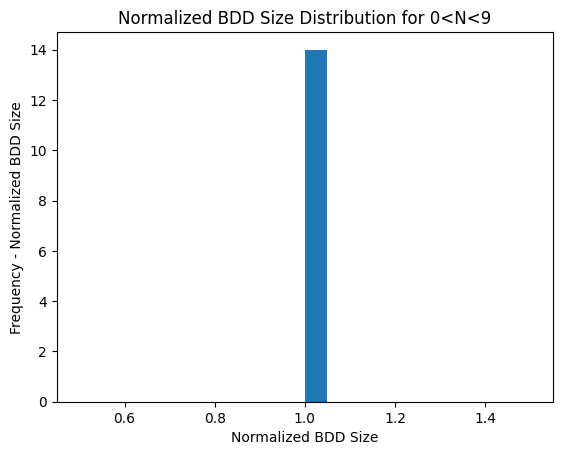

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Plot the normalized BDD sizes
import matplotlib.pyplot as plt

#plt.hist(X_count, bins=20)
plt.hist(X_count_normalized, bins=20)
plt.title('Normalized BDD Size Distribution for 0<N<9')
plt.xlabel("Normalized BDD Size")
plt.ylabel("Frequency - Normalized BDD Size")
plt.savefig("normalized_bdd.svg", format='svg')
plt.show()
from google.colab import files
files.download('normalized_bdd.svg')

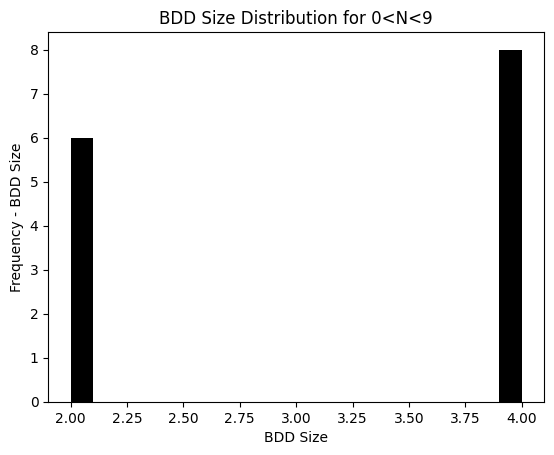

In [ ]:
# Plot the normalized BDD sizes
import matplotlib.pyplot as plt

#plt.hist(X_count, bins=20)
plt.hist(X_count, bins=20, color='black')
plt.title('BDD Size Distribution for 0<N<9')
plt.xlabel("BDD Size")
plt.ylabel("Frequency - BDD Size")
#plt.savefig("bdd_size.svg", format='svg')
plt.show()
# from google.colab import files
# files.download('bdd_size.svg')

In [ ]:
# Token the inputs and outputs
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical


# Add a blank token for CTC
blank_token = ''

# Define the unique tokens in the inputs and outputs
unique_input_tokens = OPERANDS + OPERATORS + [blank_token]
unique_output_tokens = OPERANDS + [blank_token]

# Create a token-to-index mapping
input_token_to_index = {token: idx for idx, token in enumerate(unique_input_tokens)}

# Adjust the output token-to-index mapping to start from 1, reserving 0 for the blank label
output_token_to_index = {token: idx for idx, token in enumerate(unique_output_tokens)}
# output_token_to_index[blank_token] = 0  # Set the blank label index to 0

# Function to numericalize a sequence of tokens using the shared tokenizer
def numericalize_tokens(sequence, token_to_index):
    return [token_to_index[token] for token in sequence]

# Tokenize and numericalize the input expressions
numericalized_expressions = [numericalize_tokens(expr, input_token_to_index) for expr in X_expressions]

# Tokenize and numericalize the output orderings
numericalized_orderings = [numericalize_tokens(order, output_token_to_index) for order in Y_expressions]

# Pad the sequences to have the same length
max_input_len = max(map(len, numericalized_expressions))
max_output_len = max(map(len, numericalized_orderings))
max_output_len = max_output_len
X_seq = pad_sequences(numericalized_expressions, maxlen=max_input_len, padding='post', value=input_token_to_index[blank_token])
Y_seq = pad_sequences(numericalized_orderings, maxlen=max_output_len, padding='post', value=output_token_to_index[blank_token])

X_input_lengths = np.array([len(expr) for expr in X_expressions])
X_label_lengths = np.array([len(chars) for chars in Y_expressions])

# The size of the vocabulary including the padding token
input_vocab_size = len(unique_input_tokens)
output_vocab_size = len(unique_output_tokens)
print("Max Input Size: ", max_input_len)
print("Max Output Size: ", max_output_len)
print("Input Vocabulary Size: ", input_vocab_size)
print("Input Vocabulary", unique_input_tokens)
print("Output Vocabulary Size: ", output_vocab_size)
print("Output Vocabulary", unique_output_tokens)


Max Input Size:  15
Max Output Size:  8
Input Vocabulary Size:  11
Input Vocabulary ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', '|', '&', '']
Output Vocabulary Size:  9
Output Vocabulary ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', '']


In [ ]:
print(X_input_lengths)
print(X_label_lengths)
print(X_expressions[1:8])
print(X_seq[1:8])
print(Y_expressions[1:8])
print(Y_seq[1:8])

[ 7  7 13 ... 15 15 15]
[2 2 4 ... 6 6 6]
['d|d&b|d', 'f|c&e&c&c|f&d', 'f|c&e&c&c|f&d', 'f|c&e&c&c|f&d', 'f|c&e&c&c|f&d', 'f|c&e&c&c|f&d', 'f|c&e&c&c|f&d']
[[ 3  8  3  9  1  8  3 10 10 10 10 10 10 10 10]
 [ 5  8  2  9  4  9  2  9  2  8  5  9  3 10 10]
 [ 5  8  2  9  4  9  2  9  2  8  5  9  3 10 10]
 [ 5  8  2  9  4  9  2  9  2  8  5  9  3 10 10]
 [ 5  8  2  9  4  9  2  9  2  8  5  9  3 10 10]
 [ 5  8  2  9  4  9  2  9  2  8  5  9  3 10 10]
 [ 5  8  2  9  4  9  2  9  2  8  5  9  3 10 10]]
[('b', 'd'), ('e', 'c', 'd', 'f'), ('e', 'c', 'f', 'd'), ('e', 'd', 'c', 'f'), ('e', 'd', 'f', 'c'), ('e', 'f', 'c', 'd'), ('e', 'f', 'd', 'c')]
[[1 3 8 8 8 8 8 8]
 [4 2 3 5 8 8 8 8]
 [4 2 5 3 8 8 8 8]
 [4 3 2 5 8 8 8 8]
 [4 3 5 2 8 8 8 8]
 [4 5 2 3 8 8 8 8]
 [4 5 3 2 8 8 8 8]]


In [ ]:
import numpy as np


def dense_to_sparse(dense_labels, label_lengths):
    indices = []
    values = []

    for batch_item, label in enumerate(dense_labels):
        for time_step, label_value in enumerate(label):
            if time_step < label_lengths[batch_item]:  # Only consider the label up to its length
                indices.append([batch_item, time_step])
                values.append(label_value)

    indices = np.array(indices, dtype=np.int64)
    values = np.array(values, dtype=np.int32)
    dense_shape = np.array([len(dense_labels), np.max(label_lengths)], dtype=np.int64)

    return tf.SparseTensor(indices, values, dense_shape)

def dense_to_sparse(dense_labels, label_lengths):
    indices = []
    values = []

    for batch_item, label in enumerate(dense_labels):
        for time_step in range(label_lengths[batch_item]):  # Only consider the label up to its length
            indices.append([batch_item, time_step])
            values.append(label[time_step])

    indices = np.array(indices, dtype=np.int64)
    values = np.array(values, dtype=np.int32)
    dense_shape = np.array([len(dense_labels), np.max(label_lengths)], dtype=np.int64)

    return tf.SparseTensor(indices=indices, values=values, dense_shape=dense_shape)


# Create Train/Test/Validate Splits
from sklearn.model_selection import train_test_split

X_seq_filtered = X_seq
Y_seq_filtered = Y_seq

X_count_normalized_filtered = X_count_normalized

# Convert the filtered X_count_normalized to a pandas Series
X_count_series = pd.Series(X_count_normalized_filtered)

# Create bins for stratified sampling
num_bins = 10  # You can adjust the number of bins based on your specific needs
X_count_binned = pd.qcut(X_count_series, q=num_bins, labels=False, duplicates='drop')

# Split the data into training and temporary sets (the latter will be further split into validation and test sets)
X_train_temp, X_test, Y_train_temp, Y_test, X_count_train_temp, X_count_test, X_train_input_lengths_temp, X_input_lengths_test, X_train_output_lengths_temp, X_output_lengths_test = train_test_split(
    X_seq_filtered, Y_seq_filtered, X_count_normalized_filtered, X_input_lengths, X_label_lengths, test_size=0.2, random_state=372
)

# Split the temporary set into validation and test sets
X_train, X_val, Y_train, Y_val, X_count_train, X_count_val, X_input_lengths_train, X_input_lengths_val, X_output_lengths_train, X_output_lengths_val = train_test_split(
    X_train_temp, Y_train_temp, X_count_train_temp, X_train_input_lengths_temp, X_train_output_lengths_temp, test_size=0.25, random_state=372
)

# Filter out rows where X_count_normalized is not 1.0 for validation and test sets
val_mask = (X_count_val == 1.0).reshape(-1)
test_mask = (X_count_test == 1.0).reshape(-1)

X_val = X_val[val_mask]
Y_val = Y_val[val_mask]
X_count_val = X_count_val[val_mask]
X_input_lengths_val = X_input_lengths_val[val_mask]
X_output_lengths_val = X_output_lengths_val[val_mask]

X_test = X_test[test_mask]
Y_test = Y_test[test_mask]
X_count_test = X_count_test[test_mask]
X_input_lengths_test = X_input_lengths_test[test_mask]
X_output_lengths_test = X_output_lengths_test[test_mask]

# Reshape the X_count arrays to have 2 dimensions
X_count_train = X_count_train.reshape(-1, 1)
X_count_val = X_count_val.reshape(-1, 1)
X_count_test = X_count_test.reshape(-1, 1)
#X_input_lengths_train = X_input_lengths_train.reshape(-1, 1)
#X_output_lengths_train = X_output_lengths_train.reshape(-1, 1)
X_input_lengths_train = X_input_lengths_train.reshape(-1)
X_output_lengths_train = X_output_lengths_train.reshape(-1)

# Convert dense labels to sparse for each set
Y_train_sparse = dense_to_sparse(Y_seq[X_train], X_output_lengths_train)
Y_val_sparse = dense_to_sparse(Y_seq[X_val], X_output_lengths_train)
Y_test_sparse = dense_to_sparse(Y_seq[X_test], X_output_lengths_train)

# Create TensorFlow datasets for each set with the additional X_count input
train_dataset = tf.data.Dataset.from_tensor_slices(((X_train, X_count_train, X_input_lengths_train, X_output_lengths_train), Y_train_sparse))
val_dataset = tf.data.Dataset.from_tensor_slices(((X_val, X_count_val, X_input_lengths_val, X_output_lengths_train), Y_val_sparse))
test_dataset = tf.data.Dataset.from_tensor_slices(((X_test, X_count_test, X_input_lengths_test, X_output_lengths_train), Y_test_sparse))

# del train_dataset
# del val_dataset
# del test_dataset
# Create TensorFlow datasets for each set with the additional X_count input
# train_dataset = tf.data.Dataset.from_tensor_slices(((X_train, X_count_train, X_input_lengths_train, X_output_lengths_train), Y_train))
# val_dataset = tf.data.Dataset.from_tensor_slices(((X_val, X_count_val, X_input_lengths_val, X_output_lengths_val), Y_val))
# test_dataset = tf.data.Dataset.from_tensor_slices(((X_test, X_count_test, X_input_lengths_test, X_output_lengths_test), Y_test))

# Map the datasets to include the true output as part of the input tuple
train_dataset = train_dataset.map(lambda x, y: ((x[0], x[1], x[2], x[3], y), y))
val_dataset = val_dataset.map(lambda x, y: ((x[0], x[1], x[2], x[3], y), y))
test_dataset = test_dataset.map(lambda x, y: ((x[0], x[1], x[2], x[3], y), y))

ValueError: ignored

In [ ]:
print(Y_seq.shape)

(14, 3)


In [ ]:
if tf.config.list_physical_devices('GPU'):
    print("GPU is available")
else:
    print("GPU is not available")

GPU is not available


In [ ]:
class SequenceAccuracy(tf.keras.metrics.Metric):
    def __init__(self, name='sequence_accuracy', **kwargs):
        super(SequenceAccuracy, self).__init__(name=name, **kwargs)
        self.correct_sequences = self.add_weight(name='correct_sequences', initializer='zeros')
        self.total_sequences = self.add_weight(name='total_sequences', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        # Cast y_true to int32 to match y_pred's type
        y_true = tf.cast(y_true, tf.int32)

        # If y_pred is a RaggedTensor, convert it to a dense Tensor by padding with zeros
        if isinstance(y_pred, tf.RaggedTensor):
            y_pred = y_pred.to_tensor(default_value=0)

        # Compute the most likely sequence elements
        y_pred = tf.argmax(y_pred, axis=-1, output_type=tf.int32)

        # Check if the entire sequence is correct
        sequence_correct = tf.reduce_all(tf.equal(y_true, y_pred), axis=-1)
        sequence_correct = tf.cast(sequence_correct, tf.float32)

        # Update the counts
        self.correct_sequences.assign_add(tf.reduce_sum(sequence_correct))
        self.total_sequences.assign_add(tf.cast(tf.size(sequence_correct), tf.float32))

    def result(self):
        return self.correct_sequences / self.total_sequences

    def reset_state(self):
        self.correct_sequences.assign(0)
        self.total_sequences.assign(0)

In [ ]:
# Create custom Loss layer
from tensorflow.keras import layers, models, backend

class CustomLossLayer(layers.Layer):
    def __init__(self, **kwargs):
        super(CustomLossLayer, self).__init__(**kwargs)

    def call(self, inputs, mask=None):
        y_true, y_pred, bdd_size = inputs
        if mask is not None:
            mask = tf.cast(mask, tf.bool)
            # Apply the mask to y_pred using broadcasting
            y_pred *= tf.cast(mask[..., tf.newaxis], y_pred.dtype)
            # Apply the mask to y_true using broadcasting and convert to float to avoid int multiplication
            y_true = tf.cast(y_true, dtype=y_pred.dtype) * tf.cast(mask, y_pred.dtype)
            # Convert y_true back to int for sparse_categorical_crossentropy
            y_true = tf.cast(y_true, tf.int32)
        cross_entropy_loss = tf.keras.losses.sparse_categorical_crossentropy(y_true, y_pred, from_logits=False)
        # Apply the mask to the loss
        if mask is not None:
            cross_entropy_loss *= tf.cast(mask, cross_entropy_loss.dtype)
        # Multiply the loss by bdd_size, which is broadcastable to the batch dimension
        #loss = cross_entropy_loss * tf.cast(tf.broadcast_to(bdd_size, tf.shape(cross_entropy_loss)), cross_entropy_loss.dtype)
        loss = cross_entropy_loss
        self.add_loss(tf.reduce_mean(loss))  # Use tf.reduce_mean to average over the batch
        return y_pred

    # def call(self, inputs, mask=None):
    #     y_true, y_pred, bdd_size = inputs
    #     if mask is not None:
    #         mask = tf.cast(mask, tf.bool)
    #         # Apply the mask to y_pred using broadcasting
    #         y_pred *= tf.cast(mask[..., tf.newaxis], y_pred.dtype)
    #         # Apply the mask to y_true using broadcasting and convert to float to avoid int multiplication
    #         y_true = tf.cast(y_true, dtype=y_pred.dtype) * tf.cast(mask, y_pred.dtype)
    #         # Convert y_true back to int for sparse_categorical_crossentropy
    #         y_true = tf.cast(y_true, tf.int32)

    #     cross_entropy_loss = tf.keras.losses.sparse_categorical_crossentropy(y_true, y_pred, from_logits=False)

    #     # Apply the mask to the loss
    #     if mask is not None:
    #         cross_entropy_loss *= tf.cast(mask, cross_entropy_loss.dtype)

    #     # Multiply the loss by bdd_size, which is broadcastable to the batch dimension
    #     scaled_loss = cross_entropy_loss * tf.cast(tf.broadcast_to(bdd_size, tf.shape(cross_entropy_loss)), cross_entropy_loss.dtype)

    #     # Instead of reducing the mean, we sum the losses and then divide by the sum of bdd_size
    #     # This will give more weight to samples with higher bdd_size
    #     weighted_loss_sum = tf.reduce_sum(scaled_loss)
    #     bdd_size_sum = tf.reduce_sum(tf.cast(bdd_size, cross_entropy_loss.dtype))

    #     # Avoid division by zero
    #     bdd_size_sum = tf.maximum(bdd_size_sum, tf.keras.backend.epsilon())

    #     # Compute the final loss as the sum of the scaled losses divided by the sum of bdd_size
    #     final_loss = weighted_loss_sum / bdd_size_sum
    #     self.add_loss(final_loss)
    #     return y_pred

def create_baseline_model(input_vocab_size, output_vocab_size, input_len, output_len, d_model):
    # Input for the sequence
    sequence_input = layers.Input(shape=(input_len,), dtype='int32', name='sequence_input')
    # Input for BDD size
    bdd_size_input = layers.Input(shape=(1,), name='bdd_size_input')
    # Placeholder for true labels
    y_true = layers.Input(shape=(output_len,), dtype='int32', name='true_output')

    # Embedding layer for the sequence
    sequence_embedding = layers.Embedding(input_dim=input_vocab_size, output_dim=d_model, input_length=input_len)(sequence_input)

    # Flatten the sequence embeddings
    flat_sequence = layers.Flatten()(sequence_embedding)

    # Process BDD size input
    count_dense = layers.Dense(d_model, activation='relu')(bdd_size_input)

    # Concatenate the flattened sequence with the count embedding
    concatenated = layers.Concatenate()([flat_sequence, count_dense])

    # Dense layers
    dense_output = layers.Dense(d_model, activation='relu')(concatenated)
    dense_output = layers.Dense(d_model, activation='relu')(dense_output)
    dense_output = layers.Dense(d_model, activation='relu')(dense_output)

    # Final dense layer for the sequence predictions
    sequence_outputs = layers.Dense(output_vocab_size * output_len)(dense_output)
    sequence_outputs = layers.Reshape((output_len, output_vocab_size))(sequence_outputs)
    sequence_outputs = layers.Activation('softmax')(sequence_outputs)

    # Custom loss layer
    custom_loss_layer = CustomLossLayer(name='custom_loss')([y_true, sequence_outputs, bdd_size_input])

    # Create the model with two inputs and one output
    model = models.Model(inputs=[sequence_input, bdd_size_input, y_true], outputs=custom_loss_layer)

    return model

In [ ]:
# Use the strategy to create and compile the model
with strategy.scope():
  # Now, when compiling the model, you should use the training model
  baseline_model = create_baseline_model(input_vocab_size, output_vocab_size, input_len=max_input_len, output_len=max_output_len, d_model=512)
  # Compile the model
  baseline_model.compile(optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['accuracy'])

# Print the model summary
baseline_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 sequence_input (InputLayer)    [(None, 3)]          0           []                               
                                                                                                  
 embedding (Embedding)          (None, 3, 512)       2560        ['sequence_input[0][0]']         
                                                                                                  
 bdd_size_input (InputLayer)    [(None, 1)]          0           []                               
                                                                                                  
 flatten (Flatten)              (None, 1536)         0           ['embedding[0][0]']              
                                                                                              

In [ ]:
# Adjust your batch size if necessary
batch_size = 2048  # Example batch size that is a multiple of 8

del train_dataset_batched
del val_dataset_batched
del test_dataset_batched

# del train_dataset
# del val_dataset
# del test_dataset

# Adjust your dataset to use the new batch size and convert to the appropriate data type if necessary
train_dataset_batched = train_dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
val_dataset_batched = val_dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
test_dataset_batched = test_dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
# tf.config.run_functions_eagerly(False)
# tf.data.experimental.enable_debug_mode()

# Now fit the model with the adjusted datasets
history = baseline_model.fit(
    train_dataset_batched,
    validation_data=val_dataset_batched,
    epochs=1,
)

ValueError: ignored

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = baseline_model.evaluate(test_dataset)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting both training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
#plt.plot(test_loss, label='Test Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# num_layers = 4  # Number of transformer layers
# dff = 1024  # Dimensionality of the feed-forward network

# Token and position embedding for the input sequence
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, max_len, vocab_size, embed_dim, input_length):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim, input_length=input_length, mask_zero=False)  # Enable masking
        self.pos_emb = layers.Embedding(input_dim=max_len, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

    def compute_mask(self, inputs, mask=None):
        # The Embedding layer can generate a mask from the input sequence
        return self.token_emb.compute_mask(inputs)


# Multi-head self-attention
class MultiHeadSelfAttention(layers.Layer):
    def __init__(self, embed_dim, num_heads):
        super(MultiHeadSelfAttention, self).__init__()
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        assert embed_dim % num_heads == 0
        self.projection_dim = embed_dim // num_heads
        self.query_dense = layers.Dense(embed_dim)
        self.key_dense = layers.Dense(embed_dim)
        self.value_dense = layers.Dense(embed_dim)
        self.combine_heads = layers.Dense(embed_dim)

    def attention(self, query, key, value, mask):
        score = tf.matmul(query, key, transpose_b=True)
        dim_key = tf.cast(tf.shape(key)[-1], tf.float32)
        scaled_score = score / tf.math.sqrt(dim_key)

        if mask is not None:
            # Cast the mask to the same dtype as scaled_score
            mask = tf.cast(mask, dtype=scaled_score.dtype)
            # Adding a large negative value to masked positions, to push their softmax probability close to zero
            scaled_score += (mask[:, tf.newaxis, tf.newaxis, :] * -1e9)

        weights = tf.nn.softmax(scaled_score, axis=-1)
        output = tf.matmul(weights, value)
        return output, weights

    def separate_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.projection_dim))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, inputs, mask=None):
        batch_size = tf.shape(inputs)[0]
        query = self.query_dense(inputs)
        key = self.key_dense(inputs)
        value = self.value_dense(inputs)
        query = self.separate_heads(query, batch_size)
        key = self.separate_heads(key, batch_size)
        value = self.separate_heads(value, batch_size)
        attention, _ = self.attention(query, key, value, mask)
        attention = tf.transpose(attention, perm=[0, 2, 1, 3])
        concat_attention = tf.reshape(attention, (batch_size, -1, self.embed_dim))
        output = self.combine_heads(concat_attention)
        return output

# Transformer block as a combination of multi-head self-attention and a feed-forward network
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadSelfAttention(embed_dim, num_heads)
        self.ffn = tf.keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim)]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training, mask=None):
        attn_output = self.att(inputs, mask=mask)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

In [ ]:
# Define the full Transformer model
def create_transformer(input_vocab_size, output_vocab_size, input_len, output_len, d_model, num_heads, dff, rate=0.1, num_layers=4):
    # Input for the sequence
    sequence_input = layers.Input(shape=(input_len,), dtype='int32', name='sequence_input')
    # Input for BDD size
    bdd_size_input = layers.Input(shape=(1,), name='bdd_size_input')
    # Placeholder for true labels
    y_true = layers.Input(shape=(output_len,), dtype='int32', name='true_output')

    # Embedding layers for the sequence
    embedding_layer = TokenAndPositionEmbedding(input_len, input_vocab_size, d_model)
    sequence_embedding = embedding_layer(sequence_input)

    # Extract the mask from the embedding layer
    mask = embedding_layer.compute_mask(sequence_input)

    # Transformer blocks
    x = sequence_embedding
    for _ in range(num_layers):
        transformer_block = TransformerBlock(d_model, num_heads, dff, rate)
        x = transformer_block(x, training=True, mask=mask)  # Pass the training argument to the transformer block

    # Final dense layer for the sequence predictions
    sequence_outputs = layers.TimeDistributed(layers.Dense(output_vocab_size, activation='softmax'))(x)

    # Custom loss layer
    #custom_loss_layer = CustomLossLayer(name='custom_loss')([y_true, sequence_outputs, bdd_size_input], mask=mask)

    # Create the model with two inputs and one output
    model = models.Model(inputs=[sequence_input, bdd_size_input, y_true], outputs=sequence_outputs)

    return model

# Use the strategy to create and compile the model
with strategy.scope():
  # Now, when compiling the model, you should use the training model
  transformer_model = create_transformer(input_vocab_size, output_vocab_size, input_len=max_input_len, output_len=max_output_len, d_model=512, num_heads=8, dff=1024)
  # Compile the model
  transformer_model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy', SequenceAccuracy()])

# Print the model summary
transformer_model.summary()

In [ ]:
history = transformer_model.fit(
    train_dataset_batched,
    validation_data=val_dataset_batched,
    epochs=100,
)

In [ ]:
test_loss = transformer_model.evaluate(test_dataset_batched)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting both training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(loss, label='Training Loss', color='red')
plt.plot(val_loss, label='Validation Loss', color='green')
#plt.plot(test_loss, label='Test Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("training_loss.svg", format='svg')
plt.show()
plt.show()
# from google.colab import files
# files.download('training_loss.svg')

In [ ]:
class CTCAccuracy(tf.keras.metrics.Metric):
    def __init__(self, name='ctc_accuracy', **kwargs):
        super(CTCAccuracy, self).__init__(name=name, **kwargs)
        self.correct_predictions = self.add_weight(name='cp', initializer='zeros')
        self.total_predictions = self.add_weight(name='tp', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        # Perform CTC decode on predictions
        input_length = tf.fill([tf.shape(y_pred)[0]], tf.shape(y_pred)[1])
        decoded = tf.keras.backend.ctc_decode(y_pred, input_length, greedy=True)[0][0][:, :tf.shape(y_true)[1]]
        # Cast decoded tensor to int32 to match y_true
        decoded = tf.cast(decoded, tf.int32)
        # Compute accuracy
        correct = tf.reduce_all(tf.equal(y_true, decoded), axis=-1)
        correct = tf.cast(correct, tf.float32)
        # Update correct and total predictions
        self.correct_predictions.assign_add(tf.reduce_sum(correct))
        self.total_predictions.assign_add(tf.cast(tf.size(correct), tf.float32))


    def result(self):
        # Calculate the accuracy
        return self.correct_predictions / self.total_predictions

    def reset_state(self):
        # Reset the metric state variables
        self.correct_predictions.assign(0.0)
        self.total_predictions.assign(0.0)

# Define the CTC loss layer
class CTCLossLayer(layers.Layer):
    def __init__(self, **kwargs):
        super(CTCLossLayer, self).__init__(**kwargs)
        self.loss_fn = tf.keras.backend.ctc_batch_cost
        #self.loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')

    def call(self, inputs):
        y_true, y_pred, input_length, label_length = inputs
        # Compute the CTC loss
        loss = self.loss_fn(y_true, y_pred, input_length, label_length)
        #loss = self.loss_fn(y_true, y_pred)
        self.add_loss(tf.reduce_mean(loss))
        return y_pred

# Define the full model with CTC loss
def create_ctc_model(input_vocab_size, output_vocab_size, input_len, output_len, d_model, num_heads, dff, rate=0.1, num_layers=4):
    # Input for the sequence
    sequence_input = layers.Input(shape=(input_len,), dtype='int32', name='sequence_input')

    # Input for BDD size (if needed)
    bdd_size_input = layers.Input(shape=(1,), name='bdd_size_input')

    # Input for the input sequence lengths
    input_length_input = layers.Input(shape=(1,), dtype='int32', name='input_length_input')

    # Input for the true label sequence lengths
    label_length_input = layers.Input(shape=(1,), dtype='int32', name='label_length_input')

    # Placeholder for true labels
    y_true = layers.Input(shape=(output_len,), dtype='int32', name='true_output')

    # Embedding layers for the sequence
    # embedding_layer = TokenAndPositionEmbedding(input_len, input_vocab_size, d_model, input_length=input_len)
    # sequence_embedding = embedding_layer(sequence_input)

    # # Extract the mask from the embedding layer
    # # mask = embedding_layer.compute_mask(sequence_input)

    # # Transformer blocks
    # x = sequence_embedding
    # for _ in range(num_layers):
    #     transformer_block = TransformerBlock(d_model, num_heads, dff, rate)
    #     x = transformer_block(x, training=True, mask=None)  # Pass the training argument to the transformer block


    # Embedding layer for the sequence
    sequence_embedding = layers.Embedding(input_dim=input_vocab_size, output_dim=d_model, input_length=input_len)(sequence_input)

    # LSTM or other RNN layers
    x = layers.LSTM(d_model, return_sequences=True)(sequence_embedding)

    # Final dense layer for the sequence predictions
    sequence_outputs = layers.TimeDistributed(layers.Dense(output_vocab_size, activation='softmax'))(x)
    # Transpose the output to match CTC requirements (time_steps, batch_size, num_classes)
    #sequence_outputs = layers.Lambda(lambda x: tf.transpose(x, perm=[0, 1, 2]))(sequence_outputs)
    # Final dense layer for the sequence predictions
    # sequence_outputs = layers.TimeDistributed(layers.Dense(output_vocab_size, activation=None))(x)
    #sequence_outputs = layers.TimeDistributed(layers.Dense(output_vocab_size, activation=None))(x)

    # CTC loss layer
    ctc_loss_layer = CTCLossLayer()([y_true, sequence_outputs, input_length_input, label_length_input])

    # Create the model with inputs and outputs
    model = models.Model(inputs=[sequence_input, bdd_size_input, input_length_input, label_length_input, y_true], outputs=ctc_loss_layer)

    return model

# Create and compile the model
ctc_model = create_ctc_model(input_vocab_size, output_vocab_size, input_len=max_input_len, output_len=max_output_len, d_model=256, num_heads=8, dff=1024)
ctc_model.compile(optimizer=tf.keras.optimizers.Adam(1e-3, clipnorm=1.0), metrics=[CTCAccuracy()])

# Print the model summary
ctc_model.summary()

tf.debugging.check_numerics = True

Model: "model_52"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 sequence_input (InputLayer)    [(None, 15)]         0           []                               
                                                                                                  
 embedding_68 (Embedding)       (None, 15, 256)      2816        ['sequence_input[0][0]']         
                                                                                                  
 lstm_51 (LSTM)                 (None, 15, 256)      525312      ['embedding_68[0][0]']           
                                                                                                  
 true_output (InputLayer)       [(None, 8)]          0           []                               
                                                                                           

In [ ]:
print(input_vocab_size)
print(output_vocab_size)
print(max_input_len)
print(max_output_len)

11
9
15
8


In [ ]:
history = ctc_model.fit(
    train_dataset_batched,
    validation_data=val_dataset_batched,
    epochs=100,
)

Epoch 1/100
260/260 [==============================] - 73s 270ms/step - loss: 13.4942 - ctc_accuracy: 0.0000e+00 - val_loss: 10.4949 - val_ctc_accuracy: 0.0000e+00
Epoch 2/100
 78/260 [========>.....................] - ETA: 48s - loss: 13.0708 - ctc_accuracy: 0.0000e+00

KeyboardInterrupt: ignored

In [ ]:
# Function to convert dense labels to sparse tensors
def dense_to_sparse(dense_labels):
    indices = []
    values = []
    max_len = 0

    for batch_index, label in enumerate(dense_labels):
        label_len = len(label)
        max_len = max(max_len, label_len)
        indices.extend(zip([batch_index] * label_len, range(label_len)))
        values.extend(label)

    shape = [len(dense_labels), max_len]  # [batch_size, max_sequence_length]
    return tf.SparseTensor(indices=indices, values=values, dense_shape=shape)

# Add a method to convert dense labels to sparse tensors within the TensorFlow graph
# def dense_to_sparse_tf(dense_labels, label_lengths):
#     return tf.py_function(dense_to_sparse, [dense_labels, label_lengths], Tout=[tf.int64, tf.int64, tf.int64])

# Define a function to convert dense labels to sparse tensors within the TensorFlow graph
def dense_to_sparse_tf(dense_labels, label_lengths):
    indices = []
    values = []
    max_len = tf.reduce_max(label_lengths)
    for batch_index, label in enumerate(dense_labels):
        indices.extend(zip([batch_index] * label_lengths[batch_index], range(label_lengths[batch_index])))
        values.extend(label[:label_lengths[batch_index]])
    shape = [len(dense_labels), max_len]  # [batch_size, max_sequence_length]
    return tf.SparseTensor(indices=indices, values=values, dense_shape=shape)

# A wrapper function for the PyFunction
def dense_to_sparse_wrapper(dense_labels, label_lengths):
    sparse_labels = tf.py_function(dense_to_sparse_tf, [dense_labels, label_lengths], Tout=[tf.int64, tf.int64, tf.int64])
    # The `py_function` does not set the shape and rank for the returned tensors.
    sparse_labels[0].set_shape([None, 2])  # [num_labels, 2]
    sparse_labels[1].set_shape([None])     # [num_labels]
    sparse_labels[2].set_shape([2])        # [batch_size, max_sequence_length]
    return tf.SparseTensor(*sparse_labels)



# Assuming Y_expressions is a list of lists where each sublist is a sequence of labels
# Convert sequence lengths to tensors
X_input_seq_lengths = tf.convert_to_tensor([len(expr) for expr in X_expressions], dtype=tf.int32)
X_output_seq_lengths = tf.convert_to_tensor([len(chars) for chars in Y_expressions], dtype=tf.int32)
X_count_normalized_tensor = tf.convert_to_tensor(X_count_normalized, dtype=tf.float32)

sparse_Y_expressions = dense_to_sparse_tf(Y_seq, X_output_seq_lengths.numpy())

# Create a dataset from the input sequences and their lengths
train_dataset_ctc = tf.data.Dataset.from_tensor_slices((X_seq, X_input_seq_lengths, X_output_seq_lengths))

# Batch and pad the dense tensors (input sequences and lengths) for better performance
train_dataset_ctc = train_dataset_ctc.padded_batch(
    batch_size,
    padded_shapes=(
        tf.TensorShape([None]),  # Input sequences can be of any length
        tf.TensorShape([]),      # Input sequence lengths are scalar
        tf.TensorShape([])       # Output sequence lengths are scalar
    ),
    padding_values=(
        0,  # Assume 0 is the padding value for input sequences
        0,  # Assume 0 is the padding value for input sequence lengths
        0   # Assume 0 is the padding value for output sequence lengths
    )
)

# Batch the sparse tensor separately without padding
sparse_dataset = tf.data.Dataset.from_tensor_slices(sparse_Y_expressions).batch(batch_size)

# Zip the dense and sparse datasets together
train_dataset_ctc = tf.data.Dataset.zip((train_dataset_ctc, sparse_dataset))

In [ ]:
# Define the full Transformer model
def create_ctc_transformer(input_vocab_size, output_vocab_size, input_len, output_len, d_model, num_heads, dff, rate=0.1, num_layers=4):
    # Input for the sequence
    sequence_input = layers.Input(shape=(input_len,), dtype='int32', name='sequence_input')
    # Input for BDD size
    bdd_size_input = layers.Input(shape=(1,), name='bdd_size_input')
    # Input for input X sequence lengths
    #input_sequence_lengths = layers.Input(shape=(1,), dtype='int32', name='input_sequence_lengths')
    # Input for output Y sequence lengths
    #output_sequence_lengths = layers.Input(shape=(1,), dtype='int32', name='output_sequence_lengths')

    # Embedding layers for the sequence
    embedding_layer = TokenAndPositionEmbedding(input_len, input_vocab_size, d_model)
    sequence_embedding = embedding_layer(sequence_input)

    # Extract the mask from the embedding layer
    mask = embedding_layer.compute_mask(sequence_input)

    # Transformer blocks
    x = sequence_embedding
    for _ in range(num_layers):
        transformer_block = TransformerBlock(d_model, num_heads, dff, rate)
        x = transformer_block(x, training=True, mask=mask)  # Pass the training argument to the transformer block

    # Final dense layer for the sequence predictions (logits)
    sequence_logits = layers.TimeDistributed(layers.Dense(output_vocab_size, activation=None))(x)

    # Create the model with inputs and logits as outputs
    #model = models.Model(inputs=[sequence_input, bdd_size_input, input_sequence_lengths, output_sequence_lengths], outputs=sequence_logits)

    model = models.Model(inputs=[sequence_input, bdd_size_input], outputs=sequence_logits)

    return model


with strategy.scope():
    # Create the CTC Transformer model
    ctc_transformer_model = create_ctc_transformer(input_vocab_size, output_vocab_size, input_len=max_input_len, output_len=max_output_len, d_model=512, num_heads=8, dff=1024)
    # Compile the model with a dummy loss since the actual loss is added inside the model
    ctc_transformer_model.compile(optimizer=tf.keras.optimizers.Adam(1e-4))

# Print the model summary
ctc_transformer_model.summary()

In [ ]:
# Define the optimizer
optimizer = tf.keras.optimizers.Adam(1e-4)

# Define the number of epochs
num_epochs = 50

# Define the batch size
batch_size = 64  # Adjust the batch size according to your system's capabilities

del train_dataset_ctc_batched
# Batch and prefetch the dataset for better performance
train_dataset_ctc_batched = train_dataset_ctc.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

def distributed_step_fn(inputs, input_lengths, label_lengths, sparse_labels):
    per_replica_losses = strategy.run(step_fn, args=(inputs, input_lengths, label_lengths, sparse_labels))
    return strategy.reduce(tf.distribute.ReduceOp.MEAN, per_replica_losses, axis=None)

# Training loop
for epoch in range(num_epochs):
    print(f'Epoch {epoch+1}/{num_epochs}')
    epoch_loss_avg = tf.keras.metrics.Mean()

    # Iterate over the batches of the dataset
    for batch, ((inputs, input_lengths, label_lengths), sparse_labels) in enumerate(train_dataset_ctc_batched):
        # Define a step function that will be distributed across replicas
        def step_fn(inputs, input_lengths, label_lengths, sparse_labels):
            with tf.GradientTape() as tape:
                logits = ctc_transformer_model([inputs, dummy_bdd_size_input], training=True)
                loss = tf.nn.ctc_loss(
                    labels=sparse_labels,
                    logits=logits,
                    label_length=label_lengths,
                    logit_length=input_lengths,
                    logits_time_major=False,
                    blank_index=-1  # Make sure this is the correct index for the blank token
                )
                loss = tf.reduce_mean(loss)  # Reduce the mean to get the average loss
            gradients = tape.gradient(loss, ctc_transformer_model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, ctc_transformer_model.trainable_variables))
            return loss

        # Distribute the step function across replicas
        loss = distributed_step_fn(inputs, input_lengths, label_lengths, sparse_labels)

        epoch_loss_avg.update_state(loss)

        if batch % 10 == 0:
            print(f'Batch {batch}: Loss: {epoch_loss_avg.result().numpy()}')

    # End of epoch
    print(f'Epoch {epoch+1} finished with loss: {epoch_loss_avg.result().numpy()}')